In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
data = pd.read_csv("jobs.csv")
words_data = data["words"]

In [3]:
def parse_dict(serial):
    try:
        return ast.literal_eval(serial)
    except (SyntaxError, ValueError):
        return {}
words_data["Serials"] = data["words"].apply(parse_dict)
words_data = words_data["Serials"].apply(pd.Series)
sums = pd.DataFrame(words_data.sum(), columns=["Total"])
sums["Word"] = sums.index
sums.reset_index(drop=True, inplace=True)
sums= sums[["Word", "Total"]]
sums = sums.sort_values("Total", ascending=False).head(25)


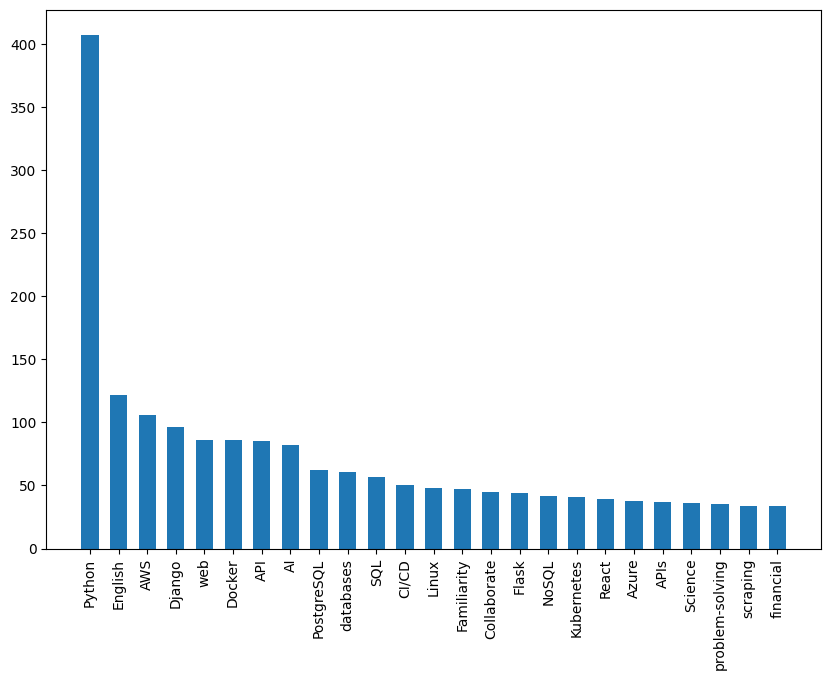

In [4]:
fig = plt.figure(figsize =(10, 7))
plt.bar(sums["Word"], sums["Total"], width = 0.6)
plt.xticks(rotation=90)
plt.show()